In [1]:
import pandas as pd
filepath = 'C:/Users/qvn/Documents/Projets DATA OC/P9_NGUYEN_Quoc_Vuong/ex1.xlsx'

df = pd.read_excel(open(filepath,'rb'))

In [2]:
df

data       mois
0   512765 2021-10-01
1   404914 2021-11-01
2   430061 2021-12-01
3   376564 2022-01-01
4   373221 2022-02-01
5   391457 2022-03-01
6   479613 2022-04-01
7   435126 2022-05-01
8   539027 2022-06-01
9   532446 2022-07-01
10  442271 2022-08-01
11  451746 2022-09-01

In [4]:
df.mois = pd.to_datetime(df.mois,errors='coerce',yearfirst = True, format ='%Y-%m')

In [5]:
df.mois

0    2021-10-01
1    2021-11-01
2    2021-12-01
3    2022-01-01
4    2022-02-01
5    2022-03-01
6    2022-04-01
7    2022-05-01
8    2022-06-01
9    2022-07-01
10   2022-08-01
11   2022-09-01
Name: mois, dtype: datetime64[ns]

In [5]:
df_par_mois = df.resample('M', on='Mois').sum()
df_par_mois

DJU_chauffage  DJU_clim  Consommation totale  Production totale  \
Mois                                                                          
2012-01-31          444.6       0.0                51086              57177   
2012-02-29          574.1       0.0                54476              54419   
2012-03-31          253.4       0.0                43156              48583   
2012-04-30          211.2       3.3                40176              44192   
2012-05-31           90.3      25.9                35257              40433   
...                   ...       ...                  ...                ...   
2021-04-30          259.1       0.0                37777              79048   
2021-05-31          165.7       1.9                34982              82677   
2021-06-30            4.4      27.8                31968              78231   
2021-07-31            0.0       0.0                32980              80999   
2021-08-31            0.0       0.0                30799              77397   

            Production nucléaire  Production thermique totale  \
Mois                                                            
2012-01-31                 42811                         5399   
2012-02-29                 38661                         8721   
2012-03-31                 37549                         5276   
2012-04-30                 33100                         3484   
2012-05-31                 29058                         1772   
...                          ...                          ...   
2021-04-30                 54414                         6045   
2021-05-31                 55145                         2421   
2021-06-30                 55428                         3042   
2021-07-31                 56894                         3100   
2021-08-31                 58017                         1794   

            Production thermique charbon  Production thermique fioul  \
Mois                                                                   
2012-01-31                           741                         691   
2012-02-29                          2511                        1309   
2012-03-31                          1435                         666   
2012-04-30                          1655                         486   
2012-05-31                           854                         368   
...                                  ...                         ...   
2021-04-30                           374                         214   
2021-05-31                            37                         174   
2021-06-30                            58                         189   
2021-07-31                           109                         209   
2021-08-31                           141                         214   

            Production thermique gaz  Production hydraulique  ...  \
Mois                                                          ...   
2012-01-31                      3967                    6741  ...   
2012-02-29                      4901                    5244  ...   
2012-03-31                      3175                    3894  ...   
2012-04-30                      1343                    5302  ...   
2012-05-31                       549                    7706  ...   
...                              ...                     ...  ...   
2021-04-30                      5453                    8021  ...   
2021-05-31                      2204                   12423  ...   
2021-06-30                      2790                   12323  ...   
2021-07-31                      2776                   11163  ...   
2021-08-31                      1435                    8706  ...   

            Production solaire  Production bioénergies  Solde exportateur  \
Mois                                                                        
2012-01-31                 125                     514               5371   
2012-02-29                 216                     454               -71

In [6]:
#Suppression des 2 dernières lignes car données fausses et nulles
index_drop  = df_par_mois.iloc[[114,115]].index
df_par_mois = df_par_mois.drop(index_drop)
df_par_mois = df_par_mois.rename(columns={'Consommation totale':'Conso_totale'})

# On divise conso_totale par 100 pour avoir des Twh comme unité 
# Source : https://opendata.reseaux-energies.fr/explore/dataset/prod-national-annuel-filiere/table/?sort=annee
df_par_mois.Conso_totale = df_par_mois.Conso_totale/100
df_par_mois

DJU_chauffage  DJU_clim  Conso_totale  Production totale  \
Mois                                                                   
2012-01-31          444.6       0.0        510.86              57177   
2012-02-29          574.1       0.0        544.76              54419   
2012-03-31          253.4       0.0        431.56              48583   
2012-04-30          211.2       3.3        401.76              44192   
2012-05-31           90.3      25.9        352.57              40433   
...                   ...       ...           ...                ...   
2021-02-28          293.9       0.0        430.25              93745   
2021-03-31          328.4       0.0        440.28              95275   
2021-04-30          259.1       0.0        377.77              79048   
2021-05-31          165.7       1.9        349.82              82677   
2021-06-30            4.4      27.8        319.68              78231   

            Production nucléaire  Production thermique totale  \
Mois                                                            
2012-01-31                 42811                         5399   
2012-02-29                 38661                         8721   
2012-03-31                 37549                         5276   
2012-04-30                 33100                         3484   
2012-05-31                 29058                         1772   
...                          ...                          ...   
2021-02-28                 60671                         8091   
2021-03-31                 63387                         8227   
2021-04-30                 54414                         6045   
2021-05-31                 55145                         2421   
2021-06-30                 55428                         3042   

            Production thermique charbon  Production thermique fioul  \
Mois                                                                   
2012-01-31                           741                         691   
2012-02-29                          2511                        1309   
2012-03-31                          1435                         666   
2012-04-30                          1655                         486   
2012-05-31                           854                         368   
...                                  ...                         ...   
2021-02-28                           540                         233   
2021-03-31                           449                         215   
2021-04-30                           374                         214   
2021-05-31                            37                         174   
2021-06-30                            58                         189   

            Production thermique gaz  Production hydraulique  ...  \
Mois                                                          ...   
2012-01-31                      3967                    6741  ...   
2012-02-29                      4901                    5244  ...   
2012-03-31                      3175                    3894  ...   
2012-04-30                      1343                    5302  ...   
2012-05-31                       549                    7706  ...   
...                              ...                     ...  ...   
2021-02-28                      7310                   13698  ...   
2021-03-31                      7550                   11816  ...   
2021-04-30                      5453                    8021  ...   
2021-05-31                      2204                   12423  ...   
2021-06-30                      2790                   12323  ...   

            Production solaire  Production bioénergies  Solde exportateur  \
Mois                                                                        
2012-01-31                 125                     514               5371   
2012-02-29                 216                     454               -715   
2012-03-31                 356                     531               4888   
2012-04-3

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

<AxesSubplot:ylabel='Frequency'>

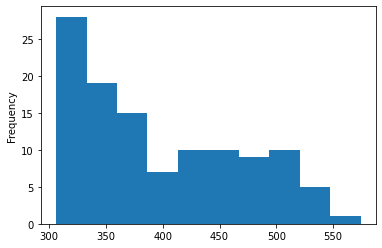

In [8]:
df_par_mois.Conso_totale.plot(kind='hist')

In [9]:
reg_simple = smf.ols('Conso_totale~DJU_chauffage',data=df_par_mois).fit()
print(reg_simple.summary())

                            OLS Regression Results                            
Dep. Variable:           Conso_totale   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1518.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.79e-67
Time:                        09:54:42   Log-Likelihood:                -494.24
No. Observations:                 114   AIC:                             992.5
Df Residuals:                     112   BIC:                             998.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       313.5097      2.783    112.671

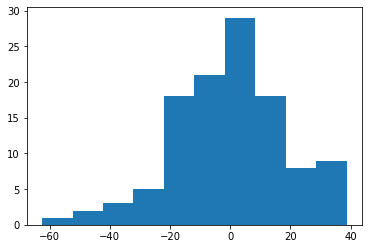

In [10]:
plt.hist(reg_simple.resid)
plt.show()

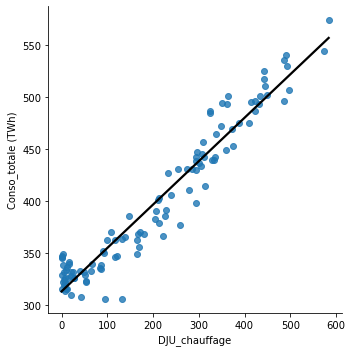

In [11]:
ax = sns.lmplot(x="DJU_chauffage", y="Conso_totale", data=df_par_mois, ci=None, line_kws={'color':'black'})
ax.set(xlabel='DJU_chauffage', ylabel='Conso_totale (TWh)')
plt.show()

In [12]:
from scipy import stats
stats.kstest(df_par_mois.Conso_totale, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [13]:
conso_corrigé = df_par_mois.Conso_totale - reg_simple.params[1]*df_par_mois.DJU_chauffage
conso_corrigé

Mois
2012-01-31    325.287796
2012-02-29    305.135613
2012-03-31    325.793026
2012-04-30    313.606942
2012-05-31    314.879559
                 ...    
2021-02-28    307.578675
2021-03-31    303.208673
2021-04-30    269.623895
2021-05-31    280.658249
2021-06-30    317.843478
Freq: M, Length: 114, dtype: float64

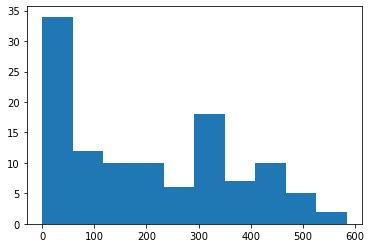

In [14]:
plt.hist(df_par_mois.DJU_chauffage)
plt.show()

In [15]:
df_par_mois.insert(0,'Conso_corrigé',conso_corrigé.values)

In [16]:
stats.kstest(df_par_mois.Conso_corrigé, 'norm')
# Ho est l'hypothèse de normalité, p-value<alpha = 0.05 donc la série de la consommation corrigé n'est pas normalement distribuée

KstestResult(statistic=1.0, pvalue=0.0)

In [17]:
stats.kstest(reg_simple.resid, 'norm')
# Les résidus ne suivent pas non plus la loi normale car p-value<alpha=0.05
# mais la prob(JB) = 0.109 > alpha donc les résidus se rapprochent de la loi normale

KstestResult(statistic=0.43599405283314663, pvalue=3.143794158485577e-20)

In [18]:
variables = reg_simple.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_simple.resid, variables)
print('p value test Breusch Pagan:', pval)
# p-value > alpha donc il y a homocédasticité des résidus

p value test Breusch Pagan: 0.9334451028946342


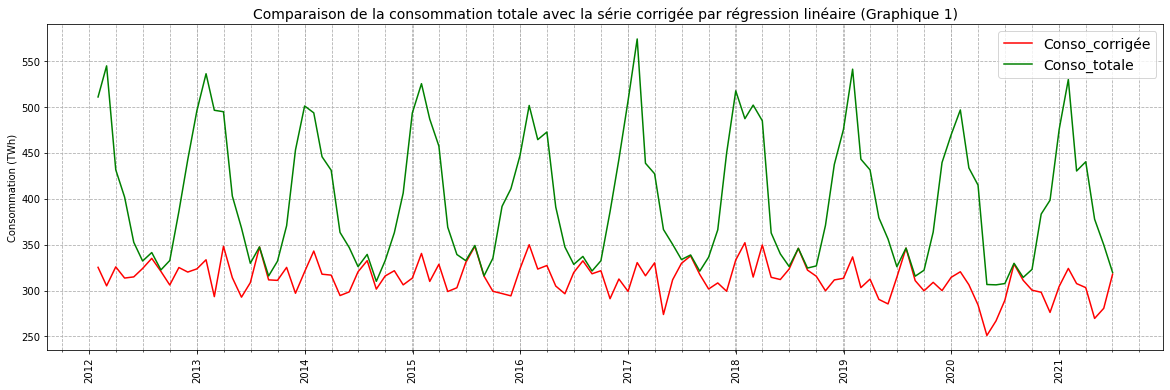

In [19]:
from matplotlib.ticker import AutoMinorLocator

plt.figure(figsize=(20,6))
plt.plot(df_par_mois.index, df_par_mois.Conso_corrigé, color="red", label="Conso_corrigée")
plt.plot(df_par_mois.index, df_par_mois.Conso_totale, color="g", label="Conso_totale")

plt.xticks(rotation=90)
plt.title('Comparaison de la consommation totale avec la série corrigée par régression linéaire (Graphique 1)',fontsize=14)
minor_locator = AutoMinorLocator(4)
ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--')
plt.legend(fontsize=14)
plt.show() 

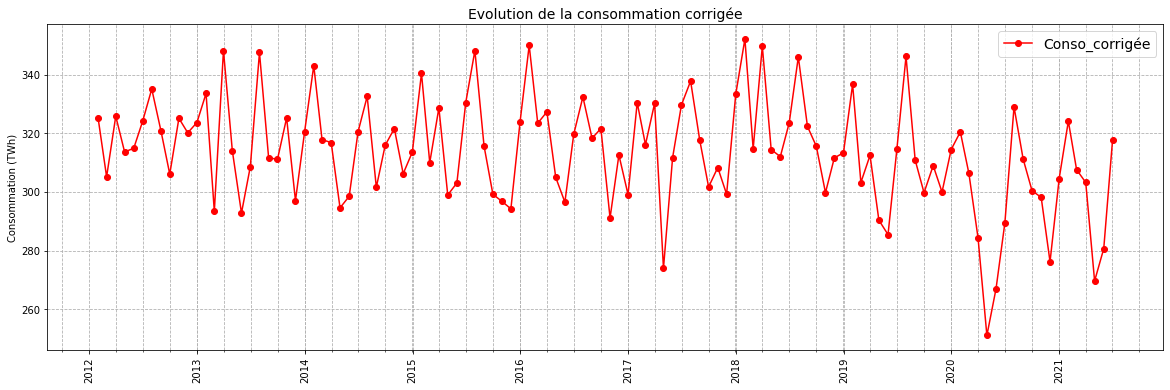

In [20]:
plt.figure(figsize=(20,6))
plt.plot(df_par_mois.index, df_par_mois.Conso_corrigé, color="red",marker = 'o', label="Conso_corrigée")


plt.xticks(rotation=90)
plt.title('Evolution de la consommation corrigée',fontsize=14)
minor_locator = AutoMinorLocator(4)
ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--')
plt.legend(fontsize=14)
plt.show() 

In [21]:
import numpy as np


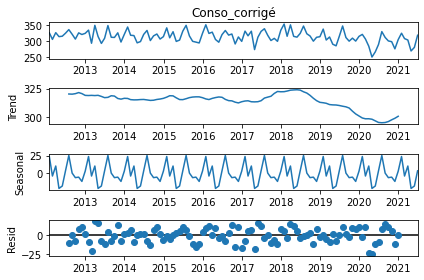

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_x = seasonal_decompose(df_par_mois.Conso_corrigé,  model='additive')
decomp_x.plot()
plt.show()

In [23]:
cvs = df_par_mois.Conso_corrigé-decomp_x.seasonal
cvs

Mois
2012-01-31    301.508391
2012-02-29    308.987014
2012-03-31    315.484543
2012-04-30    335.034995
2012-05-31    332.853015
                 ...    
2021-02-28    311.430077
2021-03-31    292.900190
2021-04-30    291.051948
2021-05-31    298.631706
2021-06-30    314.314376
Freq: M, Length: 114, dtype: float64

In [24]:
df_par_mois.insert(4,'CVS',cvs)

In [25]:
df_par_mois = df_par_mois[['DJU_chauffage','Conso_totale','Conso_corrigé','CVS']]
df_par_mois

DJU_chauffage  Conso_totale  Conso_corrigé         CVS
Mois                                                              
2012-01-31          444.6        510.86     325.287796  301.508391
2012-02-29          574.1        544.76     305.135613  308.987014
2012-03-31          253.4        431.56     325.793026  315.484543
2012-04-30          211.2        401.76     313.606942  335.034995
2012-05-31           90.3        352.57     314.879559  332.853015
...                   ...           ...            ...         ...
2021-02-28          293.9        430.25     307.578675  311.430077
2021-03-31          328.4        440.28     303.208673  292.900190
2021-04-30          259.1        377.77     269.623895  291.051948
2021-05-31          165.7        349.82     280.658249  298.631706
2021-06-30            4.4        319.68     317.843478  314.314376

[114 rows x 4 columns]

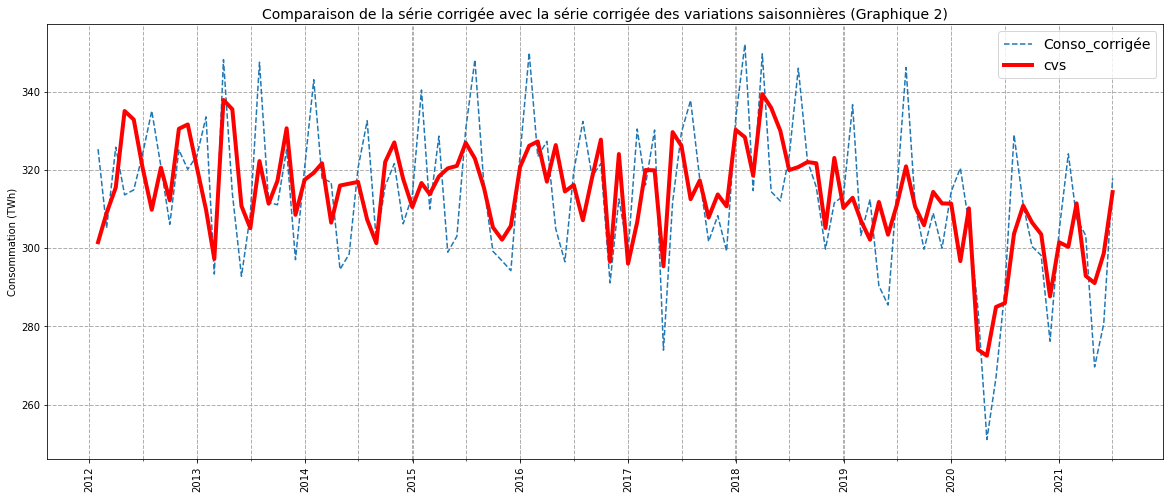

In [26]:
plt.figure(figsize=(20,8))
plt.plot(df_par_mois.index, df_par_mois.Conso_corrigé,label="Conso_corrigée",ls='--')
plt.plot(df_par_mois.index, cvs, color="r", label="cvs",linewidth=4)
plt.xticks(rotation=90)
plt.title('Comparaison de la série corrigée avec la série corrigée des variations saisonnières (Graphique 2)',fontsize=14)
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--',linewidth=1)
plt.legend(fontsize=14)
plt.show() 


C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


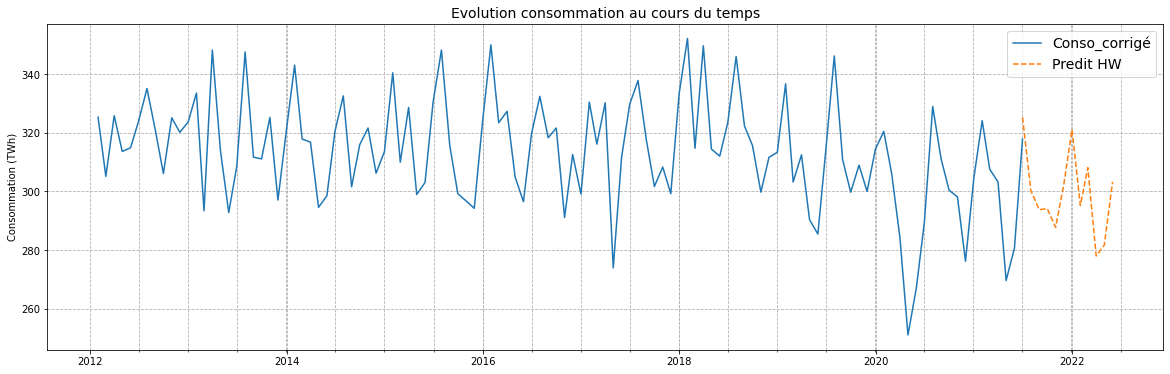

In [27]:
from statsmodels.tsa.api import *
hw = ExponentialSmoothing(np.asarray(df_par_mois.Conso_corrigé), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(20,6))

plt.plot(df_par_mois.Conso_corrigé, label='Conso_corrigé')
plt.plot(pd.date_range(df_par_mois.index[len(df_par_mois)-1], periods=12, freq='M'), hw_pred, label='Predit HW',ls='--')
ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel("Consommation (TWh)")
plt.title('Evolution consommation au cours du temps',fontsize=14)
plt.grid(which='both', linestyle='--')
plt.legend(fontsize=14)
plt.show()

In [28]:
# Décomposition de la série en 2 avec un jeu d'entrainement et un jeu de test correspondant au 12 derniers mois
test = df_par_mois[-12:]
train = df_par_mois.drop(test.index)

In [29]:
train

DJU_chauffage  Conso_totale  Conso_corrigé         CVS
Mois                                                              
2012-01-31          444.6        510.86     325.287796  301.508391
2012-02-29          574.1        544.76     305.135613  308.987014
2012-03-31          253.4        431.56     325.793026  315.484543
2012-04-30          211.2        401.76     313.606942  335.034995
2012-05-31           90.3        352.57     314.879559  332.853015
...                   ...           ...            ...         ...
2020-02-29          304.9        433.58     306.317370  310.168772
2020-03-31          312.7        414.86     284.341718  274.033235
2020-04-30          133.0        306.58     251.066947  272.495001
2020-05-31           94.0        306.22     266.985211  284.958667
2020-06-30           43.5        307.63     289.473475  285.944373

[102 rows x 4 columns]

In [30]:
test

DJU_chauffage  Conso_totale  Conso_corrigé         CVS
Mois                                                              
2020-07-31            1.8        329.70     328.948696  303.682294
2020-08-31            7.5        314.28     311.149565  310.845615
2020-09-30           54.3        323.07     300.405648  306.534542
2020-10-31          204.1        383.32     298.130421  303.540125
2020-11-30          292.8        398.40     276.187806  287.652081
2020-12-31          409.9        475.65     304.561276  301.492833
2021-01-31          493.1        529.91     324.094314  300.314910
2021-02-28          293.9        430.25     307.578675  311.430077
2021-03-31          328.4        440.28     303.208673  292.900190
2021-04-30          259.1        377.77     269.623895  291.051948
2021-05-31          165.7        349.82     280.658249  298.631706
2021-06-30            4.4        319.68     317.843478  314.314376

In [31]:
# On fait ensuite la régrssion linéaire simple sur le jeu d'entrainement et on va prédire sur les 12 mois suivant pour comparer
# avec le jeu test
reg_simple1 = smf.ols('Conso_totale~DJU_chauffage',data=train).fit()
print(reg_simple1.summary())
# Prob(JB)>alpha donc les résidus se raproche de la loi normale
# avec homocédasticité car Durbin-Watson compris entre 1 et 2

                            OLS Regression Results                            
Dep. Variable:           Conso_totale   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1442.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.19e-61
Time:                        09:54:44   Log-Likelihood:                -439.95
No. Observations:                 102   AIC:                             883.9
Df Residuals:                     100   BIC:                             889.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       314.3622      2.868    109.617

In [32]:
stats.kstest(reg_simple1.resid, 'norm')

KstestResult(statistic=0.42766918344656535, pvalue=1.8740332993726217e-17)

In [33]:
variables = reg_simple1.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_simple1.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.8539668745795302


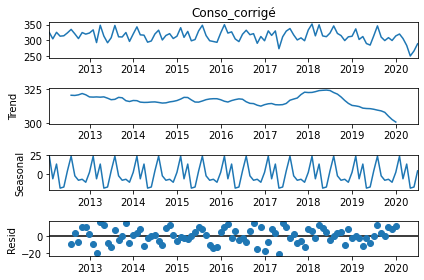

In [34]:
decomp_x = seasonal_decompose(train.Conso_corrigé,  model='additive')
decomp_x.plot()
plt.show()

In [35]:
import sklearn.metrics as metrics

In [36]:
# Lissage simple : 
liss_simple = SimpleExpSmoothing(np.asarray(train.Conso_corrigé),initialization_method="estimated").fit()
pred_simple = liss_simple.forecast(12)

In [37]:
mape_liss_simple = metrics.mean_absolute_percentage_error(test.Conso_corrigé, pred_simple)
mape_liss_simple

0.04965220076735433

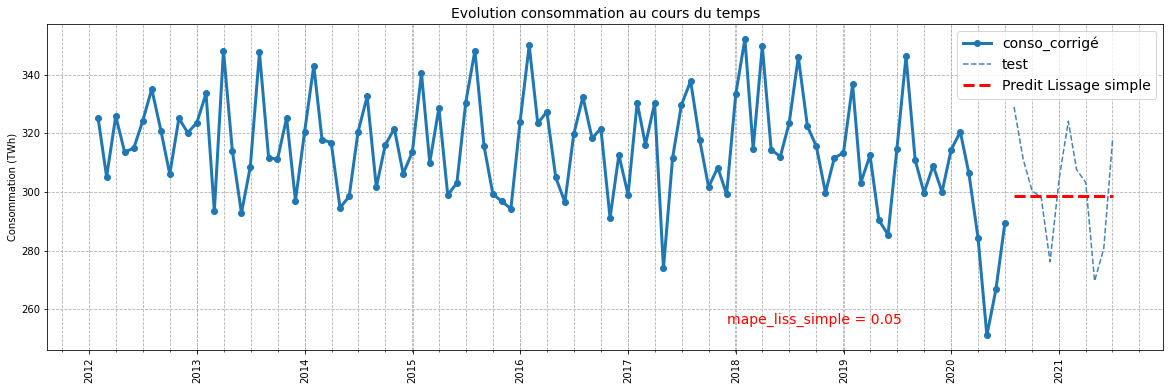

In [38]:
plt.figure(figsize=(20,6))
plt.plot(train.index, train.Conso_corrigé, label="conso_corrigé",linewidth=3,marker='o')
plt.plot(test.index, test.Conso_corrigé,color='steelblue',ls='--',label="test")
plt.plot(test.index, pred_simple, label='Predit Lissage simple',color='red',ls = '--',linewidth=3)
plt.xticks(rotation=90)
plt.title('Evolution consommation au cours du temps',fontsize = 14)
ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--')
plt.text(train.index[70],255,('mape_liss_simple = '+str(round(mape_liss_simple,3))),color='r',fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

In [39]:
# Lissage double
liss_double = Holt(np.asarray(train.Conso_corrigé),initialization_method="estimated").fit()
pred_double = liss_double.forecast(12)

In [40]:
mape_liss_double = metrics.mean_absolute_percentage_error(test.Conso_corrigé, pred_double)
mape_liss_double

0.07351244725584398

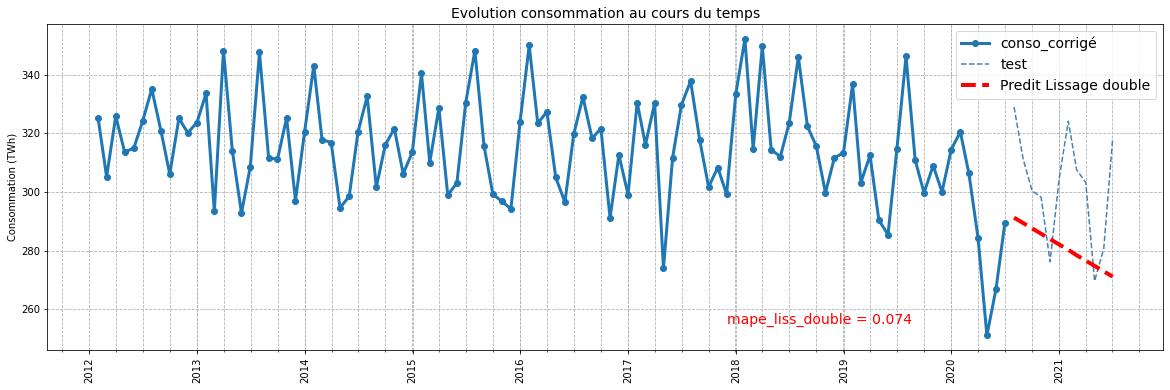

In [41]:
plt.figure(figsize=(20,6))
plt.plot(train.index, train.Conso_corrigé, label="conso_corrigé",linewidth=3,marker='o')
plt.plot(test.index, test.Conso_corrigé,color='steelblue',ls='--',label="test")
plt.plot(test.index, pred_double, label='Predit Lissage double',color='red',ls = '--',linewidth=4)
plt.xticks(rotation=90)
plt.title('Evolution consommation au cours du temps',fontsize = 14)
ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--')
plt.text(train.index[70],255,('mape_liss_double = '+str(round(mape_liss_double,3))),color='r',fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

In [42]:
hw1 = ExponentialSmoothing(np.asarray(train.Conso_corrigé), seasonal_periods=12, trend='add', seasonal='add'
                           ,damped_trend=True,initialization_method="estimated",use_boxcox=True).fit()

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [hw1.params[p] for p in params] + [hw1.sse]
hw1_pred = hw1.forecast(12)

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [43]:
results

Additive
$\alpha$  2.171429e-01
$\beta$   1.000000e-04
$\phi$    9.900000e-01
$\gamma$  1.000000e-04
$l_0$     1.528895e+06
$b_0$    -1.874479e+03
SSE       1.315180e+04

In [44]:
mse_hw = metrics.mean_squared_error(test.Conso_corrigé, hw1_pred)
rmse_hw = np.sqrt(mse_hw)
mape_hw = metrics.mean_absolute_percentage_error(test.Conso_corrigé, hw1_pred)
mape_hw

0.039907970826879975

In [45]:
train.Conso_corrigé

Mois
2012-01-31    325.287796
2012-02-29    305.135613
2012-03-31    325.793026
2012-04-30    313.606942
2012-05-31    314.879559
                 ...    
2020-02-29    306.317370
2020-03-31    284.341718
2020-04-30    251.066947
2020-05-31    266.985211
2020-06-30    289.473475
Freq: M, Name: Conso_corrigé, Length: 102, dtype: float64

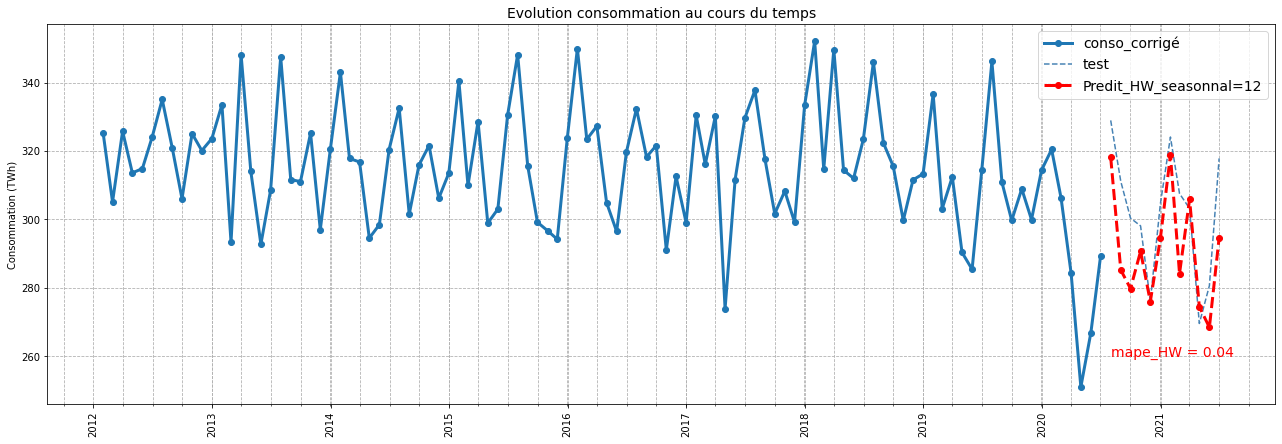

In [46]:
plt.figure(figsize=(22,7))
plt.plot(train.index, train.Conso_corrigé, label="conso_corrigé",linewidth=3,marker = 'o')
plt.plot(test.index, test.Conso_corrigé,color='steelblue',ls='--',label="test")
plt.plot(test.index, hw1_pred, label='Predit_HW_seasonnal=12',color='red',ls = '--',linewidth=3,marker='o')
plt.xticks(rotation=90)
plt.title('Evolution consommation au cours du temps',fontsize = 14)
ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--')
plt.text(test.index[0],260,('mape_HW = '+str(round(mape_hw,3))),color='r',fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


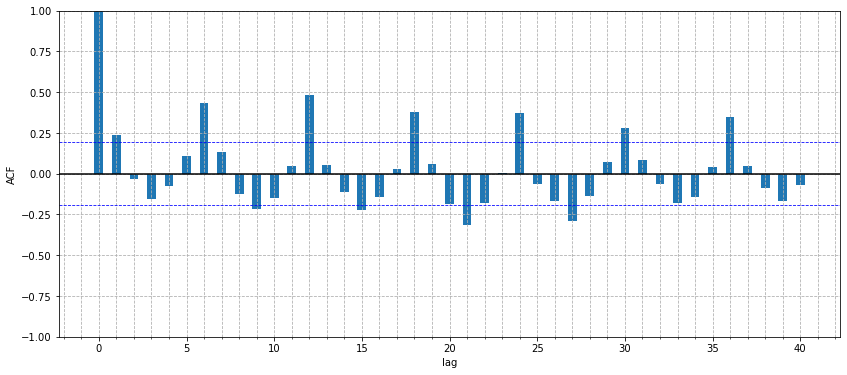

In [47]:
from statsmodels.tsa.stattools import *
from functions import plot_sortie_acf
y = train.Conso_corrigé
y_len = len(y) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(y)), y_len)

In [48]:
adfuller(y)
# Ho = non stationarité 
# p_value > alpha donc la série_corrigée est non stationnaire

(0.3090973631642364,
 0.9777580395643682,
 11,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 737.2702077503236)

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


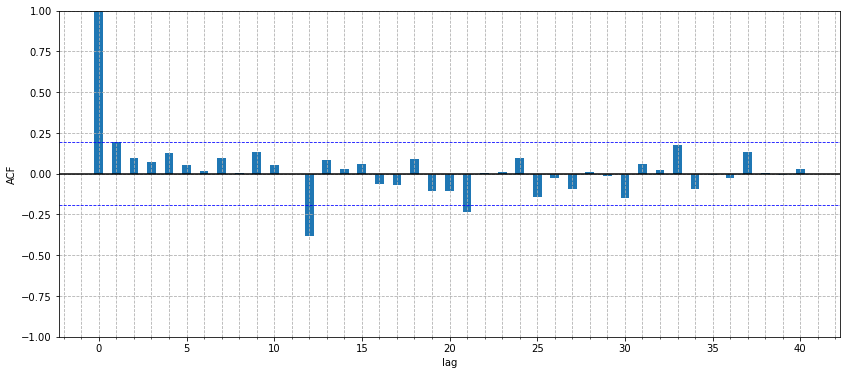

In [49]:
# On fait une différentiation partielle d'ordre 12 car sur l'autocorrélogramme, on voit une autocorrélation forte tous les 
# 12 mois qui décroit lentement vers 0
y_dif12 = y - y.shift(12)
plot_sortie_acf(acf(np.asarray(y_dif12[12:])), y_len)

In [50]:
adfuller(y_dif12[12:])
# non stationnaire mais on observe une décroissance lente de période 9 donc on va faire une deuxième différenciation partielle de période 9 

(-1.6377345119373854,
 0.46344481986431674,
 12,
 77,
 {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 635.2248371178399)

In [51]:
y_12_1 = y_dif12-y_dif12.shift(1)

In [52]:
adfuller(y_12_1[13:])

(-3.2018505928357857,
 0.01987780922512922,
 11,
 77,
 {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 628.4622449978901)

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


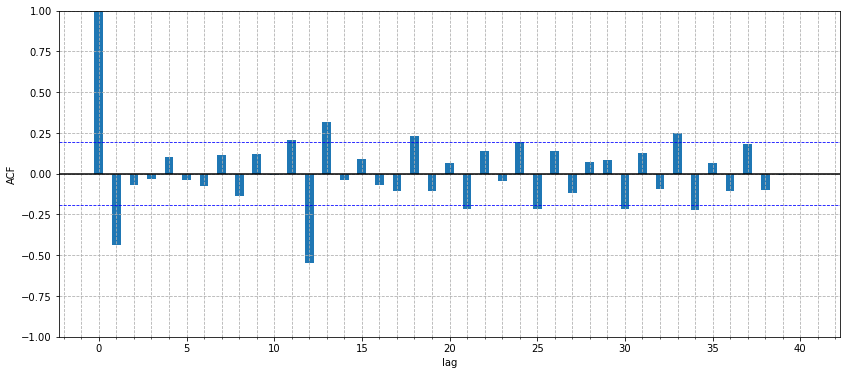

In [53]:
plot_sortie_acf(acf(np.asarray(y_12_1[13:])), y_len)
# q=1, Q=1

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


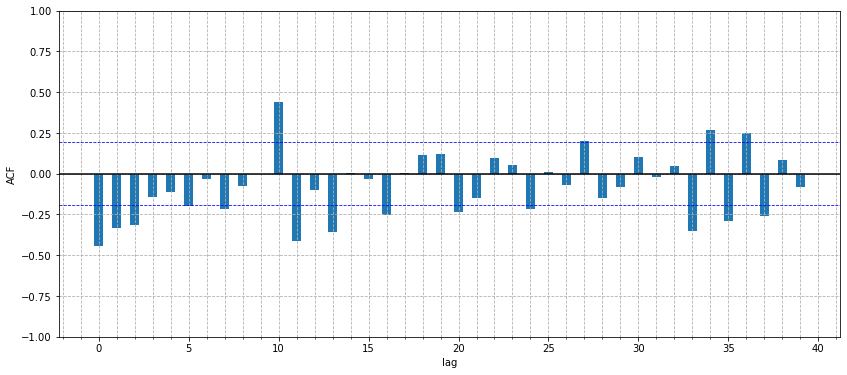

In [54]:
plot_sortie_acf(pacf(np.asarray(y_12_1[13:])), y_len, pacf=True)
# p=2, P=0

In [55]:
# params max: p=2,d=1,q=1,P=0,D=1,Q=1

from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model0 = SARIMAX(train.Conso_corrigé, order=(2,1,1), seasonal_order=(0,1,1,12))
results0 = model0.fit()
print(results0.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results0.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                      Conso_corrigé   No. Observations:                  102
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -356.280
Date:                            Mon, 24 Apr 2023   AIC                            722.559
Time:                                    09:54:47   BIC                            735.002
Sample:                                01-31-2012   HQIC                           727.575
                                     - 06-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1315      0.204      0.644      0.520      -0.269       0.532
ar.L2         -0.0656      0.145   

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [56]:
model1 = SARIMAX(train.Conso_corrigé, order=(0,1,1), seasonal_order=(0,1,1,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                      Conso_corrigé   No. Observations:                  102
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -356.990
Date:                            Mon, 24 Apr 2023   AIC                            719.980
Time:                                    09:54:47   BIC                            727.446
Sample:                                01-31-2012   HQIC                           722.989
                                     - 06-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7271      0.084     -8.704      0.000      -0.891      -0.563
ma.S.L12      -0.7643      0.167   

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


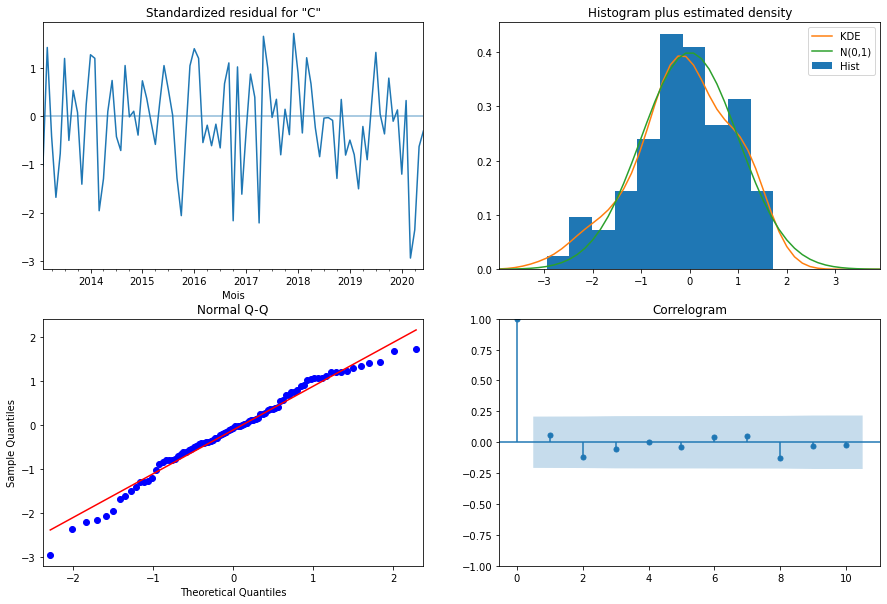

In [57]:
results1.plot_diagnostics(figsize=(15, 10))
plt.show()

In [58]:
pred_model1 = results1.get_forecast(12)
pred = pred_model1.predicted_mean
pred_l = pred_model1.conf_int(alpha=0.05).iloc[:,0]
pred_u = pred_model1.conf_int(alpha=0.05).iloc[:,1]
mse_sarima = metrics.mean_squared_error(test.Conso_corrigé, pred)
rmse_sarima = np.sqrt(mse_sarima)
mape_sarima = metrics.mean_absolute_percentage_error(test['Conso_corrigé'], pred)

In [59]:
mape_sarima

0.05987596159389406

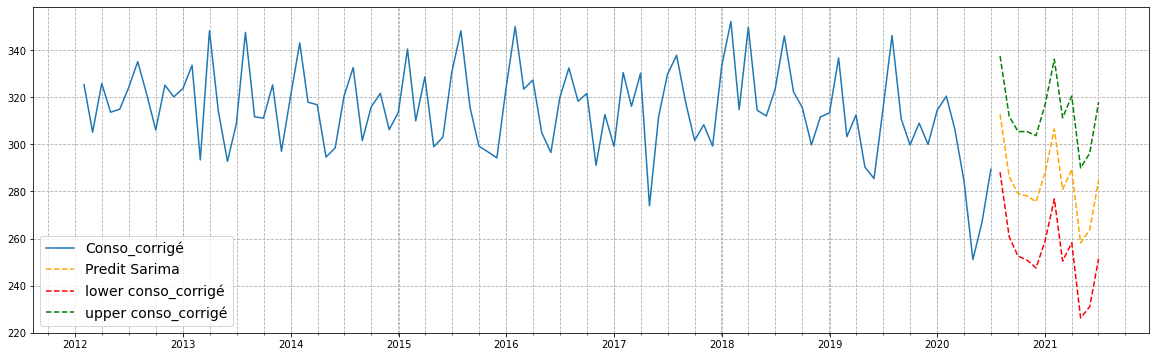

In [60]:
plt.figure(figsize=(20,6))
plt.plot(train.index,train.Conso_corrigé, label='Conso_corrigé')
plt.plot( pred.index,pred, color='orange', label='Predit Sarima',ls='--')
plt.plot( pred.index,pred_l, color='r', linestyle='--', label='lower conso_corrigé')
plt.plot( pred.index,pred_u, color='g', linestyle='--', label='upper conso_corrigé')
ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='both', linestyle='--')
plt.legend(fontsize = 14)
plt.show()

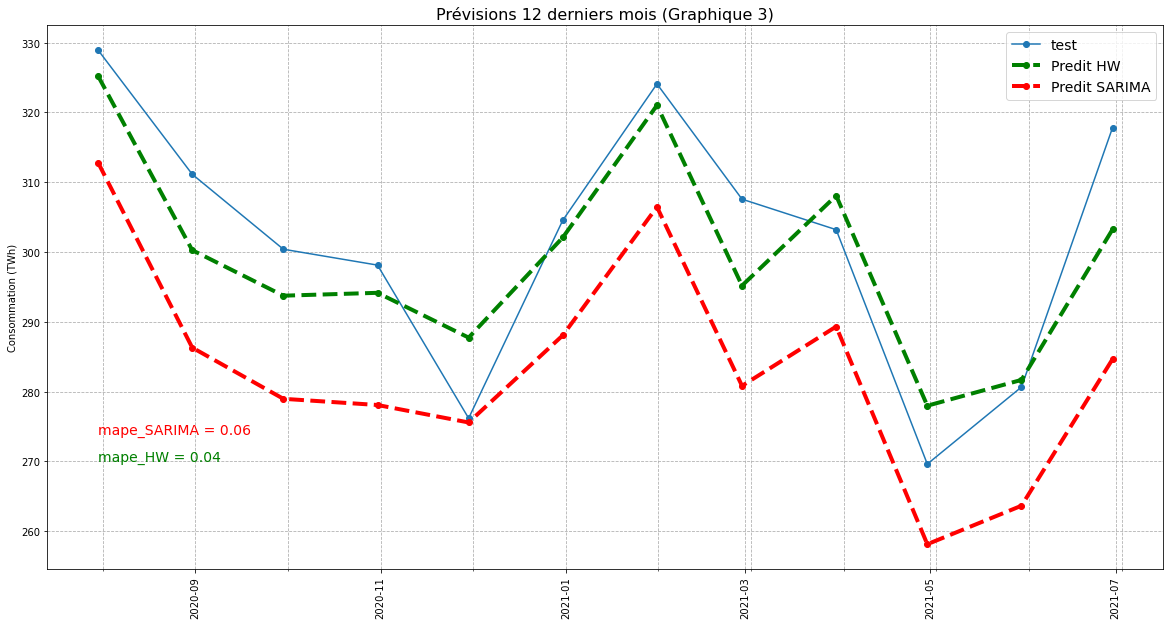

In [61]:
plt.figure(figsize=(20,10))

plt.plot(test.index, test.Conso_corrigé ,label="test",marker='o')
plt.plot(test.index, hw_pred, label='Predit HW',color='g',ls = '--',linewidth=4,marker='o')
plt.plot(test.index, pred, color='red', label='Predit SARIMA',ls = '--',linewidth=4,marker='o')


plt.xticks(rotation=90)
plt.title('Prévisions 12 derniers mois (Graphique 3)',fontsize = 16)
plt.text(test.index[0],274,('mape_SARIMA = '+str(round(mape_sarima,3))),color='r',fontsize = 14)
plt.text(test.index[0],270,('mape_HW = '+str(round(mape_hw,3))),color='g',fontsize = 14)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylabel("Consommation (TWh)")

plt.grid(which='both', linestyle='--')
plt.legend(fontsize = 14)
plt.show()

# Les données sont faussées par le covid 19 donc on va choisir un jeu de données qui exclue à partir de avril 2020

In [62]:
df_covid = df_par_mois[-15:]
df_final = df_par_mois.drop(df_covid.index)

In [63]:
test1 = df_final[-12:]
train1 = df_final.drop(test1.index)

In [64]:
train1

DJU_chauffage  Conso_totale  Conso_corrigé         CVS
Mois                                                              
2012-01-31          444.6        510.86     325.287796  301.508391
2012-02-29          574.1        544.76     305.135613  308.987014
2012-03-31          253.4        431.56     325.793026  315.484543
2012-04-30          211.2        401.76     313.606942  335.034995
2012-05-31           90.3        352.57     314.879559  332.853015
...                   ...           ...            ...         ...
2018-11-30          301.4        437.38     311.578240  323.042515
2018-12-31          388.6        475.53     313.331712  310.263269
2019-01-31          490.0        541.17     336.648227  312.868823
2019-02-28          335.2        443.11     303.200412  307.051813
2019-03-31          285.1        431.45     312.451720  302.143237

[87 rows x 4 columns]

In [65]:
test1

DJU_chauffage  Conso_totale  Conso_corrigé         CVS
Mois                                                              
2019-04-30          213.0        379.27     290.365638  311.793691
2019-05-31          169.3        356.11     285.445641  303.419097
2019-06-30           27.3        325.98     314.585216  311.056113
2019-07-31            0.3        346.29     346.164783  320.898381
2019-08-31           11.5        315.64     310.839999  310.536049
2019-09-30           53.7        322.13     299.716083  305.844977
2019-10-31          131.1        363.67     308.949991  314.359695
2019-11-30          334.2        439.45     299.957803  311.422078
2019-12-31          372.1        469.74     314.428670  311.360227
2020-01-31          422.4        496.76     320.453884  296.674480
2020-02-29          304.9        433.58     306.317370  310.168772
2020-03-31          312.7        414.86     284.341718  274.033235

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


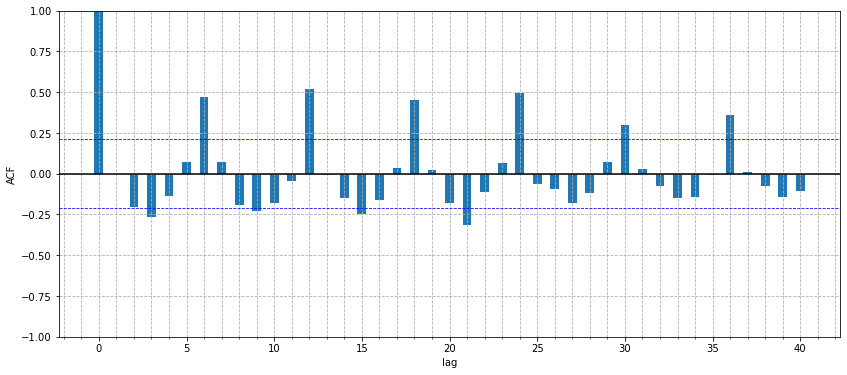

In [66]:
y1 = train1.Conso_corrigé
y1_len = len(y1) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(y1)), y1_len)

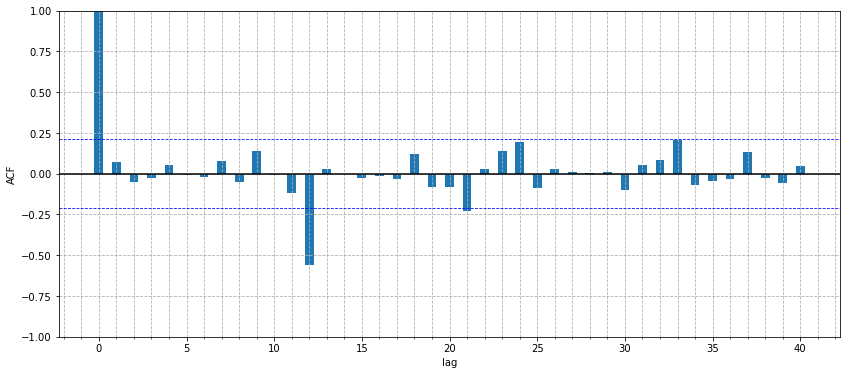

In [67]:
y1_diff12 = y1-y1.shift(12)
plot_sortie_acf(acf(np.asarray(y1_diff12[12:])), y1_len)

In [68]:
adfuller(y1_diff12[12:])

(-4.351974838666822,
 0.0003606355122936376,
 11,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 495.730116713328)

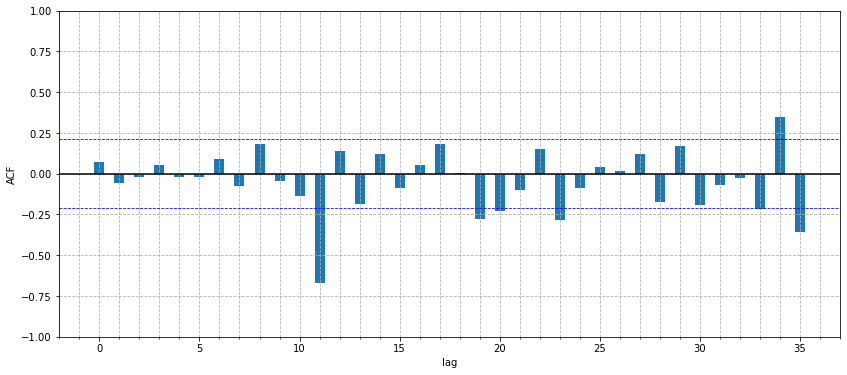

In [69]:
plot_sortie_acf(pacf(np.asarray(y1_diff12[12:]),nlags=36), y1_len, pacf=True)

In [70]:
#p=0,P=0,d=0,D=1,q=1,Q=1

In [71]:
model2 = SARIMAX(train1.Conso_corrigé, order=(0,0,0), seasonal_order=(0,1,0,12))
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                SARIMAX Results                                 
Dep. Variable:            Conso_corrigé   No. Observations:                   87
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -312.148
Date:                  Mon, 24 Apr 2023   AIC                            626.297
Time:                          09:54:49   BIC                            628.614
Sample:                      01-31-2012   HQIC                           627.222
                           - 03-31-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       241.2980     42.156      5.724      0.000     158.675     323.921
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.21
Prob(Q):                       

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [72]:
pred_model2 = results2.get_forecast(12)
pred2 = pred_model2.predicted_mean


mse_sarima2 = metrics.mean_squared_error(test1.Conso_corrigé, pred2)
rmse_sarima2 = np.sqrt(mse_sarima2)
mape_sarima2 = metrics.mean_absolute_percentage_error(test1.Conso_corrigé, pred2)

In [73]:
mape_sarima2

0.0438413025116541

In [74]:
hw2= ExponentialSmoothing(np.asarray(train1.Conso_corrigé), seasonal_periods=12, trend='add', seasonal='add'
                           ,damped_trend=True,initialization_method="estimated",use_boxcox=True).fit()
pred_hw2 = hw2.forecast(12)
mse_hw2 = metrics.mean_squared_error(test1.Conso_corrigé, pred_hw2)
rmse_hw2 = np.sqrt(mse_hw2)
mape_hw2 = metrics.mean_absolute_percentage_error(test1.Conso_corrigé, pred_hw2)

mape_hw2

0.037208722499003026

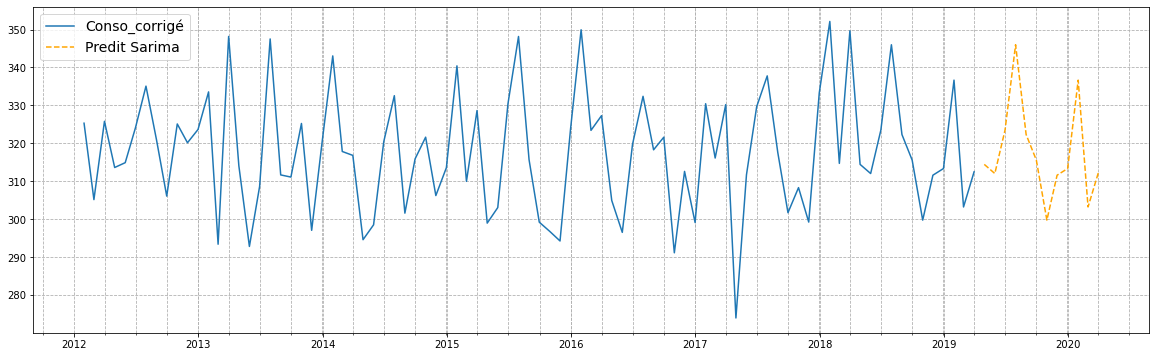

In [75]:
plt.figure(figsize=(20,6))
plt.plot(train1.index,train1.Conso_corrigé, label='Conso_corrigé')
plt.plot( pred2.index,pred2, color='orange', label='Predit Sarima',ls='--')

ax = plt.gca()
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='both', linestyle='--')
plt.legend(fontsize = 14)
plt.show()

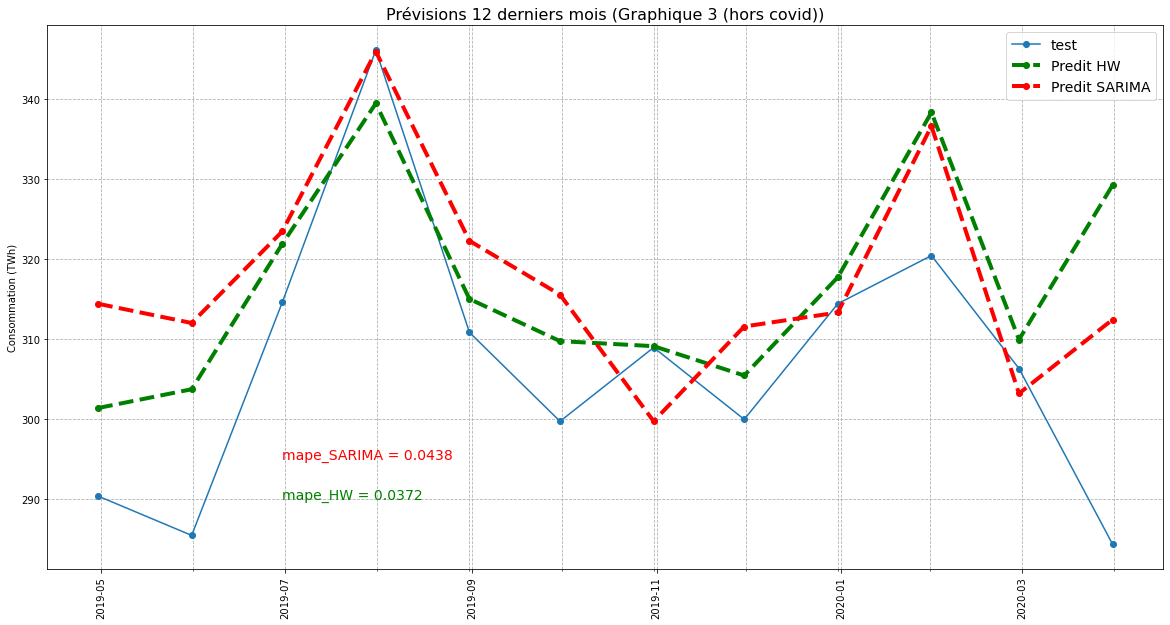

In [76]:
plt.figure(figsize=(20,10))

plt.plot(test1.index, test1.Conso_corrigé ,label="test",marker='o')
plt.plot(test1.index, pred_hw2, label='Predit HW',color='g',ls = '--',linewidth=4,marker='o')
plt.plot(test1.index, pred2, color='red', label='Predit SARIMA',ls = '--',linewidth=4,marker='o')

plt.xticks(rotation=90)
plt.title('Prévisions 12 derniers mois (Graphique 3 (hors covid))',fontsize = 16)
plt.text(test1.index[2],295,('mape_SARIMA = '+str(round(mape_sarima2,4))),color='r',fontsize = 14)
plt.text(test1.index[2],290,('mape_HW = '+str(round(mape_hw2,4))),color='g',fontsize = 14)
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylabel("Consommation (TWh)")

plt.grid(which='both', linestyle='--')
plt.legend(fontsize = 14)
plt.show()

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


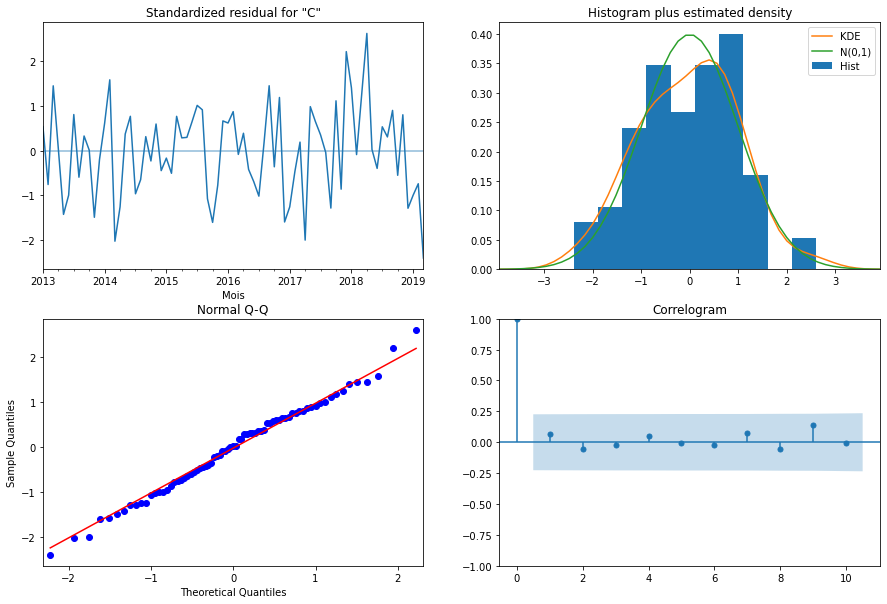

In [77]:
results2.plot_diagnostics(figsize=(15, 10))
plt.show()

In [78]:
import pmdarima as pdm

In [79]:
model4 = pdm.arima.auto_arima(train1.Conso_corrigé,test = 'adf',information_criterion='aic', alpha=0.05,m=6)
results4 = model4.fit(train1.Conso_corrigé)
print(results4.summary())
print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(model4.resid(), lags=elt)[1].mean()))

C:\Users\qvn\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,2)[6] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\qvn\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\qvn\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\qvn\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\qvn\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 690, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=me

                                 SARIMAX Results                                 
Dep. Variable:                         y   No. Observations:                   87
Model:             SARIMAX(2, 0, [1], 6)   Log Likelihood                -347.358
Date:                   Mon, 24 Apr 2023   AIC                            704.716
Time:                           09:55:00   BIC                            717.046
Sample:                                0   HQIC                           709.681
                                    - 87                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    317.4432     82.058      3.869      0.000     156.613     478.273
ar.S.L6       -0.4883      0.168     -2.899      0.004      -0.818      -0.158
ar.S.L12       0.4885      0

C:\Users\qvn\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [80]:
pred_auto1 = results4.predict(12)
mse_auto_arima1 = metrics.mean_squared_error(test1.Conso_corrigé, pred_auto1)
rmse_auto_arima1 = np.sqrt(mse_auto_arima1)
mape_auto_arima1 = metrics.mean_absolute_percentage_error(test1.Conso_corrigé, pred_auto1)

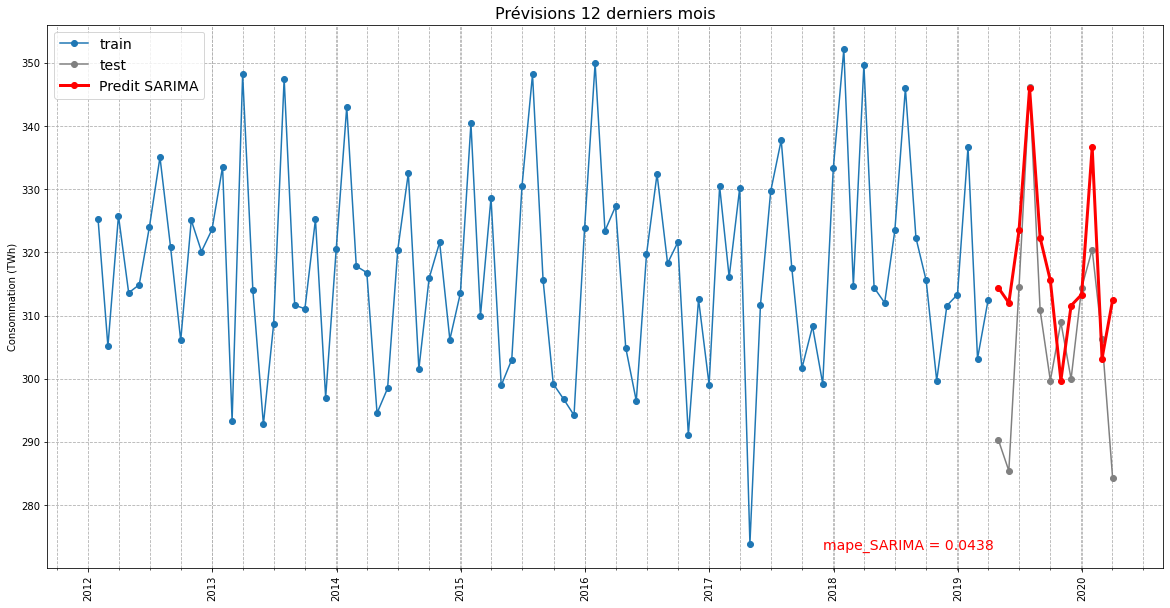

In [81]:
plt.figure(figsize=(20,10))
plt.plot(train1.index, train1.Conso_corrigé ,label="train",marker='o')
plt.plot(test1.index, test1.Conso_corrigé, color="grey" ,label="test",marker='o')
plt.plot(test1.index, pred2, color='r', label='Predit SARIMA',linewidth=3,marker='o')

plt.xticks(rotation=90)
plt.title('Prévisions 12 derniers mois',fontsize = 16)
plt.text(train1.index[70],273,('mape_SARIMA = '+str(round(mape_sarima2,4))),color='r',fontsize = 14)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--') 
plt.legend(fontsize = 14)
plt.show()

In [82]:
mape_auto_arima_cvs = metrics.mean_absolute_percentage_error(test1.CVS, pred_auto1)
mape_hw2_cvs = metrics.mean_absolute_percentage_error(test1.CVS, pred_hw2)
mape_sarima2_CVS = metrics.mean_absolute_percentage_error(test1.CVS, pred2)

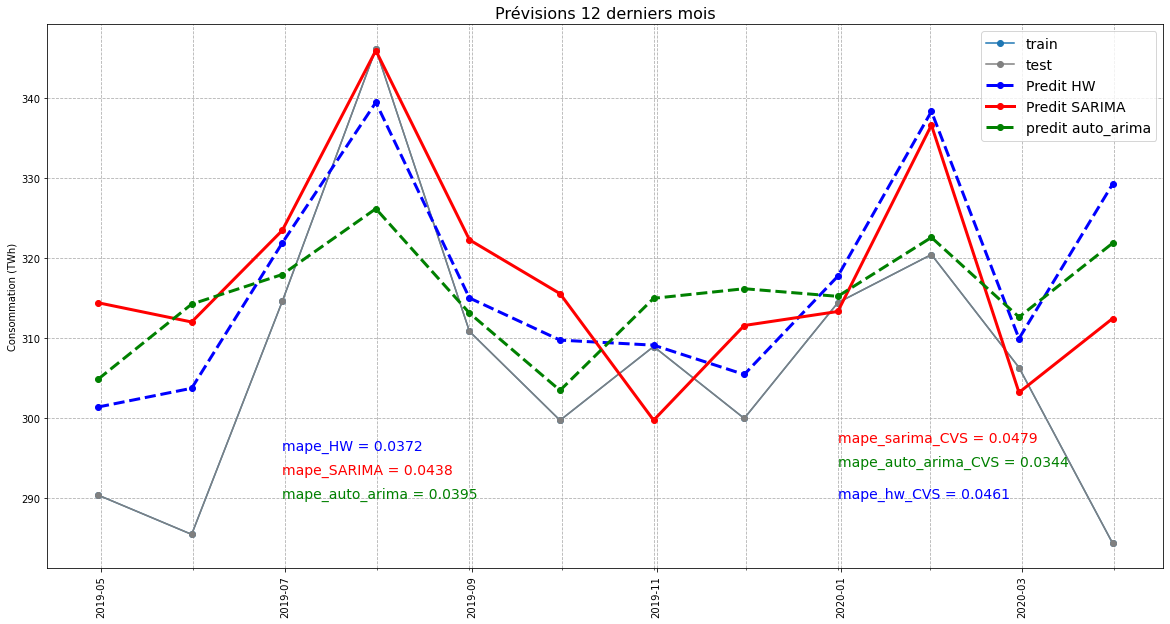

In [83]:
plt.figure(figsize=(20,10))
plt.plot(test1.index, test1.Conso_corrigé ,label="train",marker='o')
plt.plot(test1.index, test1.Conso_corrigé, color="grey" ,label="test",marker='o')
plt.plot(test1.index, pred_hw2, label='Predit HW',color='b',ls = '--',linewidth=3,marker='o')
plt.plot(test1.index, pred2, color='r', label='Predit SARIMA',linewidth=3,marker='o')
plt.plot(test1.index, pred_auto1, color='g', label='predit auto_arima',ls = '--',linewidth=3,marker='o')
plt.xticks(rotation=90)
plt.title('Prévisions 12 derniers mois',fontsize = 16)

plt.text(test1.index[2],296,('mape_HW = '+str(round(mape_hw2,4))),color='b',fontsize = 14)
plt.text(test1.index[2],293,('mape_SARIMA = '+str(round(mape_sarima2,4))),color='r',fontsize = 14)
plt.text(test1.index[2],290,('mape_auto_arima = '+str(round(mape_auto_arima1,4))),color='g',fontsize = 14)

plt.text(test1.index[8],290,('mape_hw_CVS = '+str(round(mape_hw2_cvs,4))),color='b',fontsize = 14)
plt.text(test1.index[8],297,('mape_sarima_CVS = '+str(round(mape_sarima2_CVS,4))),color='r',fontsize = 14)
plt.text(test1.index[8],294,('mape_auto_arima_CVS = '+str(round(mape_auto_arima_cvs,4))),color='g',fontsize = 14)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylabel("Consommation (TWh)")
plt.grid(which='both', linestyle='--') 
plt.legend(fontsize = 14)
plt.show()